In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET
from dateutil.parser import parse

In [2]:
bills_xml = '/path/to/xml_file'
tree = ET.parse(bills_xml)
root = tree.getroot()

In [55]:
FIRST_EVENT = 0
LAST_EVENT = -1
start_dates = pd.to_datetime([parse(bill.find('Events').find('LegislativeEvents')[FIRST_EVENT].attrib['date']) for bill in root])
end_dates = pd.to_datetime([parse(bill.find('Events').find('LegislativeEvents')[LAST_EVENT].attrib['date']) for bill in root])
days_until_royal_assent = (end_dates - start_dates).days

(array([ 116.,   50.,   53.,   43.,   41.,   26.,   30.,   31.,   27.,
          16.,    5.,    9.,   20.,   23.,   18.,    4.,    4.,    3.,
           4.,    1.,   10.]),
 array([  0,  30,  60,  90, 120, 150, 180, 210, 240, 270, 300, 330, 360,
        390, 420, 450, 480, 510, 540, 570, 600, 630]),
 <a list of 21 Patch objects>)

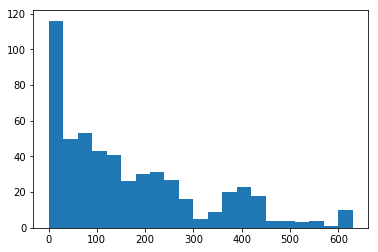

In [56]:
plt.hist(days_until_royal_assent, bins=range(0, 660, 30))

In [61]:
file_name = 'bill_days_ra.csv'
days_until_royal_assent = pd.Series(days_until_royal_assent)
days_until_royal_assent.to_csv(file_name, encoding='utf-8', index=False)